<a href="https://colab.research.google.com/github/vishva2410/Heart_-Disease_prediction-Over_fitted-/blob/main/cardiac_arrest_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
import tensorflow as t

In [6]:
df = pd.read_csv('heart.csv')
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0


In [10]:
X = df.drop('target',axis = 1)
y = df['target']

In [12]:
se = StandardScaler()
x = se.fit_transform(x)

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 23)

In [14]:
model = xgboost.XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [15]:
model.score(x_test,y_test)

1.0

In [16]:
y_pred = model.predict(x_test)

In [21]:
a = accuracy_score(y_test,y_pred)
a

1.0

In [24]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128,activation = 'relu',input_shape = (13,)),
    tf.keras.layers.Dense(64,activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
                                ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [27]:
model.fit(x_train,y_train,epochs = 100,verbose = 0,batch_size = 32,validation_data = (x_test,y_test))

In [33]:
y_predn_binary = model.predict(x_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [34]:
a2 = mean_squared_error(y_test,y_predn)
a2

9.413922441581235e-08

In [37]:

y_predn_binary = (y_predn_binary >= 0.5).astype(int)  # Convert probabilities to 0/1


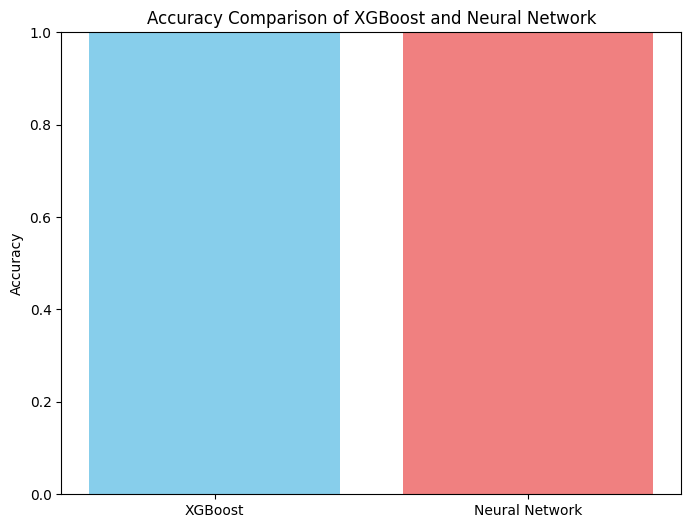

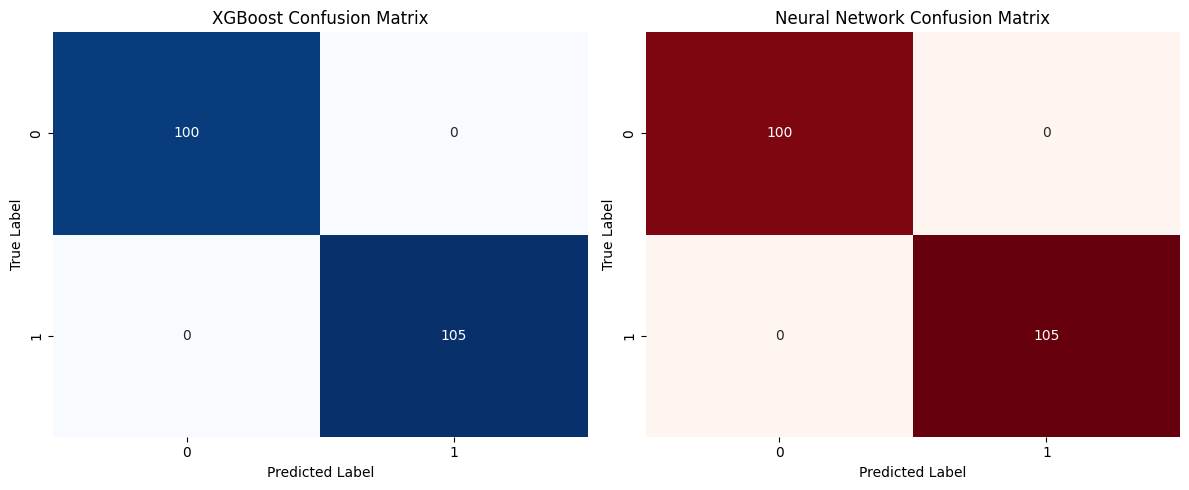

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score

xgb_accuracy = accuracy_score(y_test, y_pred)
nn_accuracy = accuracy_score(y_test, y_predn_binary)

models = ['XGBoost', 'Neural Network']
accuracies = [xgb_accuracy, nn_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['skyblue', 'lightcoral'])
plt.title('Accuracy Comparison of XGBoost and Neural Network')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

xgb_cm = confusion_matrix(y_test, y_pred)
nn_cm = confusion_matrix(y_test, y_predn_binary)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 2, 2)
sns.heatmap(nn_cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Neural Network Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()

NameError: name 'yr_pred' is not defined

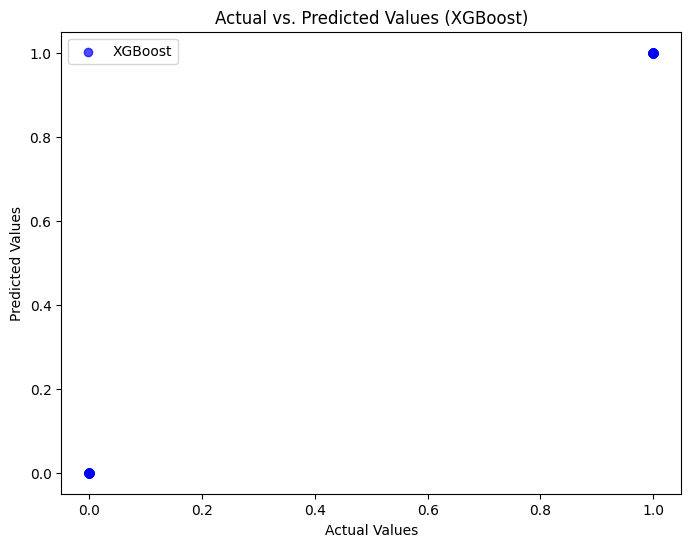

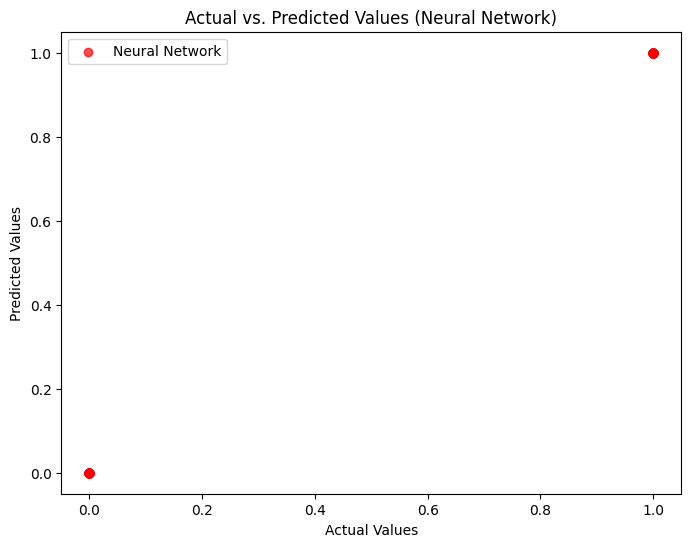

In [42]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='XGBoost')
plt.title('Actual vs. Predicted Values (XGBoost)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predn_binary, color='red', alpha=0.7, label='Neural Network')
plt.title('Actual vs. Predicted Values (Neural Network)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

ValueError: x and y must be the same size

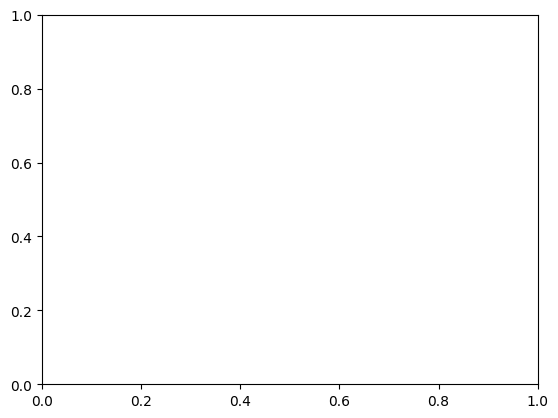

In [44]:
plt.scatter(x_train,x_test)

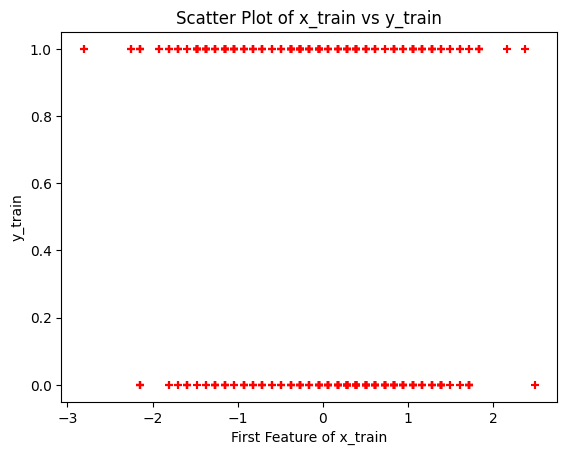

In [49]:
plt.scatter(x_train[:, 0], y_train,c='r',marker='+')
plt.xlabel('First Feature of x_train')
plt.ylabel('y_train')
plt.title('Scatter Plot of x_train vs y_train')
plt.show()